In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\emmaf\AppData\Local\Temp\ipykernel_19612\1534116213.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [4]:
X = data # boston.data
X.shape

(506, 13)

In [5]:
y = target # boston.target
y.shape

(506,)

In [ ]:
# print(boston.DESCR)

In [6]:
type(X)

numpy.ndarray

Scikit Learn accepts Numpy arrays as well as Pandas data frames

We split the data into train and test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30)

We instantiate the linear regression

In [9]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()

In [10]:
X_train.shape, y_train.shape

((354, 13), (354,))

In [ ]:
X_test.shape, y_test.shape

((152, 13), (152,))

We fit the training data to a linear model

In [15]:
LinReg.fit(X_train, y_train)

LinearRegression()

We use the model to predict the test data

In [14]:
y_predicted = LinReg.predict(X_test)

We measure the accuracy of the model by using the mean square error (MSE)

Let us use Numpy first

In [16]:
mean_sq_error = np.mean( (y_test - y_predicted) **2 )
print(mean_sq_error)

28.67351395072252


Let us use sklearn metrics next

In [17]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true = y_test, y_pred = LinReg.predict(X_test)))

28.67351395072252


What is the error on the training data

In [18]:
print(mean_squared_error(y_true = y_train, y_pred = LinReg.predict(X_train)))

20.497723059873145


In [ ]:
### How much does the model (the x variable) explain  the variability of the response data around its mean?

In [19]:
LinReg.score(X_test, y_test)

0.5709498452548665

Let us check the histogram of the residuals. Does it satisfy the assumptions for inference?

(array([ 7., 41., 64., 33.,  3.,  0.,  1.,  1.,  1.,  1.]),
 array([-10.75054663,  -6.5328412 ,  -2.31513577,   1.90256967,
          6.1202751 ,  10.33798053,  14.55568597,  18.7733914 ,
         22.99109683,  27.20880227,  31.4265077 ]),
 <BarContainer object of 10 artists>)

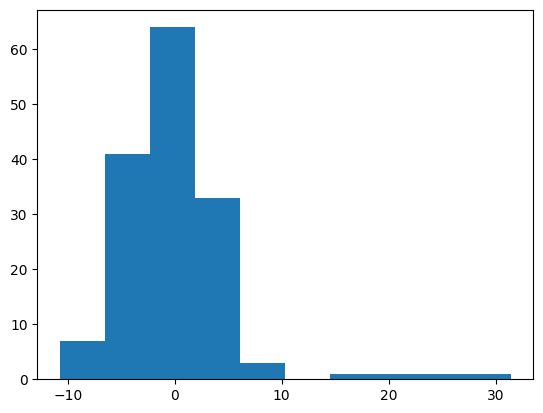

In [21]:
import matplotlib.pyplot as plt
plt.hist(y_test - y_predicted) #851809

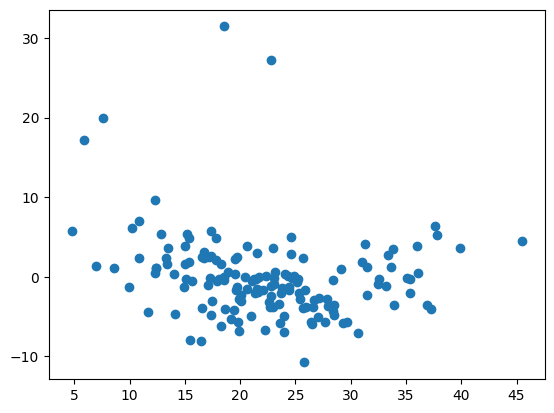

In [22]:
plt.scatter(y_predicted, y_test - y_predicted)

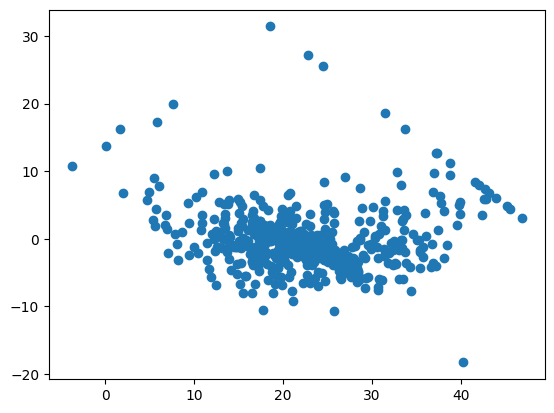

In [23]:
plt.scatter(LinReg.predict(X), y - LinReg.predict(X))

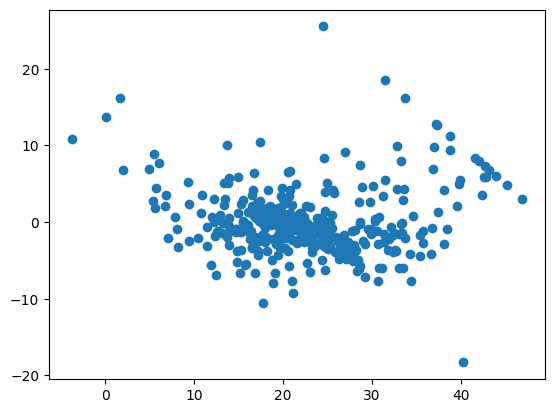

In [24]:
plt.scatter(LinReg.predict(X_train), y_train - LinReg.predict(X_train))

In [25]:
print(LinReg.coef_)


[-9.55221910e-02  3.04566323e-02  5.09804293e-02  3.79423780e+00
 -1.79700658e+01  5.43402418e+00 -1.39604785e-02 -1.33350848e+00
  2.13024111e-01 -1.06083502e-02 -1.03243062e+00  8.16482131e-03
 -3.59167968e-01]


In [ ]:
print(LinReg.intercept_)

26.536109507623497


: 